<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/ML%20course%20with%20Python/Loan_Default_Prediction_Using_Support_Vector_Machine_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
loan_data = pd.read_csv("/content/Default_Fin.csv")
loan_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
loan_data.shape

(10000, 5)

In [3]:
loan_data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [5]:
loan_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [6]:
loan_data = loan_data.dropna()
loan_data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

<Axes: xlabel='Employed', ylabel='count'>

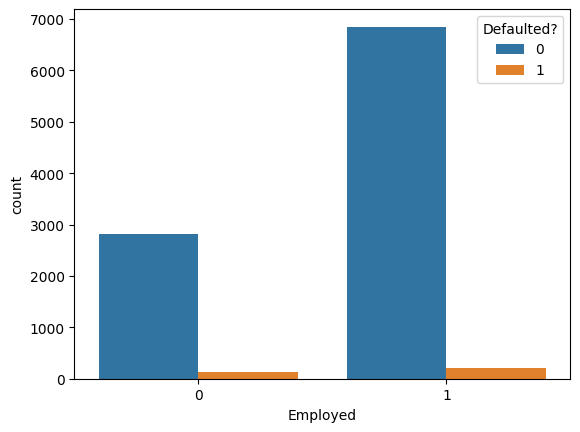

In [8]:
sns.countplot(x="Employed", hue="Defaulted?", data=loan_data)

In [9]:
X = loan_data.drop(columns=["Index", "Defaulted?"], axis=1)
Y = loan_data["Defaulted?"]
print(X)
print(Y)

      Employed  Bank Balance  Annual Salary
0            1       8754.36      532339.56
1            0       9806.16      145273.56
2            1      12882.60      381205.68
3            1       6351.00      428453.88
4            1       9427.92      461562.00
...        ...           ...            ...
9995         1       8538.72      635908.56
9996         1       9095.52      235928.64
9997         1      10144.92      703633.92
9998         1      18828.12      440029.32
9999         0       2411.04      202355.40

[10000 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(10000, 3) (8000, 3) (2000, 3)


In [11]:
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [12]:
x_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)
print("Training data accuracy is: ", training_data_accuracy)

Training data accuracy is:  0.969


In [13]:
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)
print("Training data accuracy is: ", test_data_accuracy)

Training data accuracy is:  0.969
